In [2]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

Categories=['neg','pos']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/content/drive/MyDrive/INRIA_Dataset_Samples/Train' 
#path which contains all the categories of images
for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        hog_desc = hog(img_resized, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data
#####
#
Categories=['neg','pos']
test_flat_data_arr=[] #input array
test_target_arr=[] #output array
datadir='/content/drive/MyDrive/INRIA_Dataset_Samples/Test' 
#path which contains all the categories of images
for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        hog_desc = hog(img_resized, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
        test_flat_data_arr.append(img_resized.flatten())
        test_target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
test_flat_data=np.array(test_flat_data_arr)
test_target=np.array(test_target_arr)
test_df=pd.DataFrame(test_flat_data) #dataframe
test_df['Target']=test_target
test_x=df.iloc[:,:-1] #input data 
test_y=df.iloc[:,-1] #output data

loading... category : neg
loaded category:neg successfully
loading... category : pos
loaded category:pos successfully
loading... category : neg
loaded category:neg successfully
loading... category : pos
loaded category:pos successfully


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


your model accurqcy is 1.0


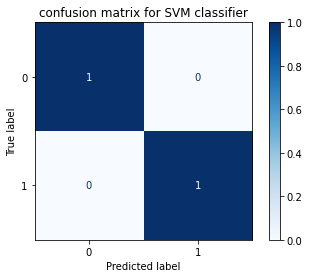

f1 score is 1.0


In [17]:

from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
support= svm.SVC(kernel= 'linear', C= 0.01).fit(x,y)
predicted= support.predict(test_x)
score=accuracy_score(test_y,predicted)
print("your model accurqcy is", score)
np.set_printoptions(precision=2)
matrix= plot_confusion_matrix(support, test_x, test_y,
                              cmap=plt.cm.Blues,
                              normalize='true')
plt.title('confusion matrix for SVM classifier')
plt.show(matrix)
f1=f1_score(test_y, predicted, average= 'weighted')
print("f1 score is", f1)
plt.show()



Your Model Accuracy is 1.0
F1-score is 1.0


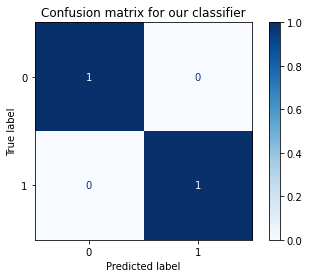

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x,y)
# prediction on test set
y_pred=clf.predict(test_x)
score=accuracy_score(test_y,predicted)
print("Your Model Accuracy is", score)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
matrix = plot_confusion_matrix(clf, test_x, test_y,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
f1=f1_score(test_y, predicted, average='weighted')
print("F1-score is", f1)
plt.title('Confusion matrix for our Random Forest Classifier')
plt.show(matrix)
plt.show()